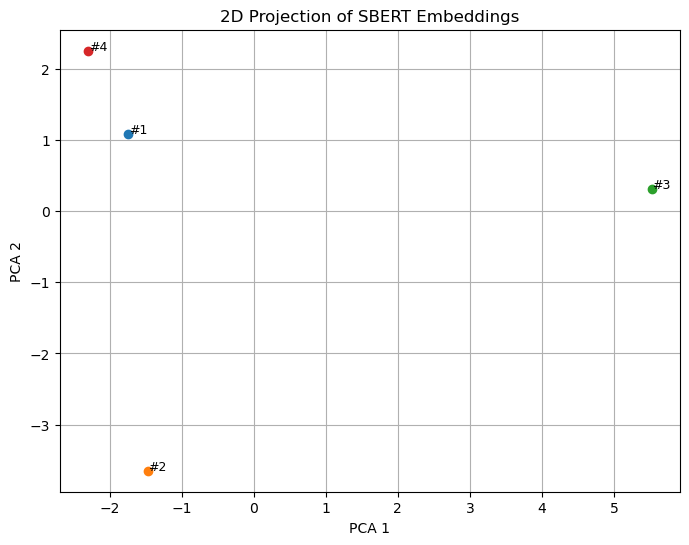

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Sample sentences
sentences = [
    "Experienced Python developer with machine learning expertise.",
    "Looking for a data scientist with strong Python skills.",
    "Digital marketing expert with SEO knowledge.",
    "Machine learning engineer with Python and TensorFlow.",
]

# Encode with SBERT
embeddings = model.encode(sentences)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, f"#{i+1}", fontsize=9)

plt.title("2D Projection of SBERT Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


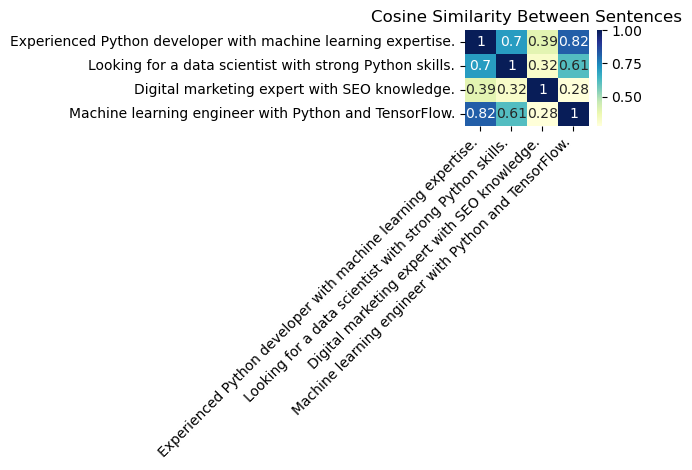

In [2]:
import seaborn as sns
import numpy as np

# Cosine similarity matrix
from sentence_transformers.util import cos_sim
sim_matrix = cos_sim(embeddings, embeddings).numpy()

# Heatmap
sns.heatmap(sim_matrix, annot=True, cmap="YlGnBu", xticklabels=sentences, yticklabels=sentences)
plt.title("Cosine Similarity Between Sentences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
